# Relação entre dependência química e TDAH

In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn-v0_8-darkgrid')
#plt.style.available

Os dados foram coletados em entrevistas com pacientes com dependência química. Cada coluna Ai e Bi representa uma questão relacionada a um sintoma de desatenção e de hiperatividade respectivamente, baseado no Adult Self Report Scale para avaliação de TDAH. Os valores estão em escala Likert, indo de 0 (nunca) a 4 (muito frequentemente), com 9 questões de cada grupo. O somatório de sintomas A e B é utilizado para auxiliar o diagnóstico, sendo 24 (por subgrupo) um limiar frequentemente adotado. <br>

Questão de pesquisa: vale a pena explorar a relação entre TDAH e dependência química?

![TDAH](./tdah.jpg "Diagnóstico de TDAH")


In [55]:
# carregando dados
df = pd.read_csv('data.csv')
df.head()

,ID,IDADE,GENERO,A1,A2,A3,A4,A5,A6,A7,...,B3,B4,B5,B6,B7,B8,B9,TOTAL A,TOTAL B,TOTAL GERAL
0,1,26,F,2,3,1,0,0,1,1,...,4,3,3,4,3,1,3,12,23,35
1,2,34,M,1,0,1,0,0,2,0,...,2,3,2,0,2,0,1,6,11,17
2,3,44,M,4,0,4,4,4,4,0,...,4,4,0,4,4,4,0,20,24,44
3,4,38,M,3,4,2,3,2,4,3,...,3,4,4,2,3,2,1,24,24,48
4,5,41,M,3,2,1,2,3,1,0,...,2,2,2,3,3,4,2,18,22,40


In [56]:
df.columns

Index(['ID', 'IDADE', 'GENERO', 'A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8',
       'A9', 'B1', 'B2', 'B3', 'B4', 'B5', 'B6', 'B7', 'B8', 'B9', 'TOTAL A',
       'TOTAL B', 'TOTAL GERAL'],
      dtype='object')

In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 24 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   ID           30 non-null     int64 
 1   IDADE        30 non-null     int64 
 2   GENERO       30 non-null     object
 3   A1           30 non-null     int64 
 4   A2           30 non-null     int64 
 5   A3           30 non-null     int64 
 6   A4           30 non-null     int64 
 7   A5           30 non-null     int64 
 8   A6           30 non-null     int64 
 9   A7           30 non-null     int64 
 10  A8           30 non-null     int64 
 11  A9           30 non-null     int64 
 12  B1           30 non-null     int64 
 13  B2           30 non-null     int64 
 14  B3           30 non-null     int64 
 15  B4           30 non-null     int64 
 16  B5           30 non-null     int64 
 17  B6           30 non-null     int64 
 18  B7           30 non-null     int64 
 19  B8           30 non-null     in

In [58]:
# calcula desvio padrão por paciente
a_questions = ['A' + str(i) for i in range(1,10)]
b_questions = ['B' + str(i) for i in range(1,10)]
df['STD_A'] = df[a_questions].std(axis=1)
df['STD_B'] = df[b_questions].std(axis=1)
df['STD_GERAL'] = df[b_questions + a_questions].std(axis=1)
# calcula evidência de TDAH baseado no valor de corte 24 em um dos sintomas
df['TDAH'] = (df['TOTAL A']>=24) | (df['TOTAL B']>=24)
# top 10 total geral
df.sort_values(by='TOTAL GERAL', ascending=False).head(10)

,ID,IDADE,GENERO,A1,A2,A3,A4,A5,A6,A7,...,B7,B8,B9,TOTAL A,TOTAL B,TOTAL GERAL,STD_A,STD_B,STD_GERAL,TDAH
7,8,23,F,4,4,3,4,4,4,4,...,4,4,4,31,36,67,1.333333,0.000000,0.958280,True
24,25,51,M,4,4,4,4,4,4,4,...,1,4,4,34,24,58,0.666667,1.224745,1.114374,True
25,26,48,M,4,1,4,2,2,4,1,...,2,4,4,23,33,56,1.424001,0.707107,1.231398,True
16,17,56,F,4,4,4,3,2,1,2,...,2,4,2,26,29,55,1.166667,1.201850,1.161754,True
26,27,57,M,2,3,4,2,1,1,1,...,2,4,2,22,30,52,1.333333,1.000000,1.231398,True
11,12,34,M,2,4,2,1,4,4,4,...,2,4,4,26,24,50,1.364225,1.658312,1.477500,True
12,13,47,F,3,2,0,4,2,2,1,...,4,4,3,19,31,50,1.364225,0.726483,1.262843,True
21,22,28,M,2,2,2,3,0,3,4,...,2,4,2,23,26,49,1.236033,0.927961,1.074055,True
3,4,38,M,3,4,2,3,2,4,3,...,3,2,1,24,24,48,1.000000,1.000000,0.970143,True
23,24,38,M,3,2,4,4,2,1,2,...,2,3,1,24,23,47,1.000000,0.881917,0.916444,True


In [59]:
# menores total geral
df.sort_values(by='TOTAL GERAL', ascending=True).head(10)

,ID,IDADE,GENERO,A1,A2,A3,A4,A5,A6,A7,...,B7,B8,B9,TOTAL A,TOTAL B,TOTAL GERAL,STD_A,STD_B,STD_GERAL,TDAH
1,2,34,M,1,0,1,0,0,2,0,...,2,0,1,6,11,17,0.707107,1.092906,0.937595,False
13,14,65,M,3,3,0,2,0,1,0,...,0,0,0,14,8,22,1.333333,1.166667,1.262843,False
28,29,22,F,0,0,1,0,0,1,0,...,4,0,3,8,15,23,1.269296,1.732051,1.526455,False
19,20,32,M,0,1,0,0,3,0,0,...,3,3,0,7,17,24,1.301708,1.691482,1.571810,False
8,9,30,F,2,1,2,1,1,2,1,...,2,0,2,12,12,24,0.500000,1.000000,0.766965,False
17,18,60,M,2,1,1,0,0,2,1,...,0,3,0,8,16,24,0.781736,1.922094,1.495090,False
27,28,57,M,1,2,1,1,0,1,1,...,1,2,2,9,17,26,0.500000,0.781736,0.783823,False
5,6,33,M,1,2,2,1,1,3,2,...,2,1,0,16,11,27,0.666667,0.971825,0.857493,False
15,16,48,M,2,3,1,2,0,1,0,...,0,0,0,16,11,27,1.394433,1.092906,1.248529,False
6,7,38,F,4,4,0,3,4,0,0,...,0,4,0,15,16,31,2.000000,1.855921,1.872575,False


## Estatísticas descritivas básicas

In [60]:
describe_columns = ['IDADE','TOTAL A', 'TOTAL B', 'TOTAL GERAL']
df_describe = df[describe_columns].describe().round(2)
df_female_describe = df[df['GENERO']=='F'][describe_columns].describe().round(2)
df_male_describe = df[df['GENERO']=='M'][describe_columns].describe().round(2)
df_describe_join = df_describe.join(df_female_describe,rsuffix='_F').join(df_male_describe,rsuffix='_M')

In [61]:
# geral
df_describe

,IDADE,TOTAL A,TOTAL B,TOTAL GERAL
count,30.00,30.00,30.00,30.00
mean,39.30,17.73,22.00,39.73
std,11.83,7.03,7.12,12.77
min,20.00,6.00,8.00,17.00
25%,31.25,12.50,16.25,27.00
50%,38.00,18.00,23.50,42.00
75%,47.75,22.75,26.00,48.75
max,65.00,34.00,36.00,67.00


In [62]:
# segmentado por gênero
df_describe_join[['IDADE_F','IDADE_M','TOTAL A_F', 'TOTAL A_M', 'TOTAL B_F', 'TOTAL B_M', 'TOTAL GERAL_F', 'TOTAL GERAL_M']]

,IDADE_F,IDADE_M,TOTAL A_F,TOTAL A_M,TOTAL B_F,TOTAL B_M,TOTAL GERAL_F,TOTAL GERAL_M
count,9.00,21.00,9.00,21.00,9.00,21.00,9.00,21.00
mean,35.11,41.10,17.89,17.67,23.67,21.29,41.56,38.95
std,11.40,11.81,7.24,7.12,8.00,6.80,14.68,12.18
min,22.00,20.00,8.00,6.00,12.00,8.00,23.00,17.00
25%,26.00,33.00,12.00,14.00,16.00,17.00,31.00,27.00
50%,34.00,38.00,18.00,18.00,25.00,23.00,44.00,40.00
75%,40.00,48.00,20.00,23.00,29.00,25.00,50.00,48.00
max,56.00,65.00,31.00,34.00,36.00,33.00,67.00,58.00


### Observações:
* Quantidade de mulheres está subrepresentada (9 participantes) em relação aos homens (21)
* Distribuição de idade é similar entre os dois grupos
* Distribuição de Total A, Total B e Total Geral também são similares. Gênero talvez não seja uma distinção significativa nos dados observados. 


In [63]:
ratio_b = (df['TOTAL B'] >= 24).sum()/len(df)
ratio_a = (df['TOTAL A'] >= 24).sum()/len(df)
ratio_ab = ((df['TOTAL A'] >= 24 ) & (df['TOTAL B'] > 24)).sum()/len(df)
ratio_a_or_b = ((df['TOTAL A'] >= 24 ) | (df['TOTAL B'] >= 24)).sum()/len(df)
ratio_a_or_b_20 = ((df['TOTAL A'] >= 20 ) | (df['TOTAL B'] >= 20)).sum()/len(df)
print(f'porcentagem de pacientes com mais de 24 pontos em A: {ratio_a*100:.2f}%')
print(f'porcentagem de pacientes com mais de 24 pontos em B: {ratio_b*100:.2f}%')
print(f'porcentagem de pacientes com mais de 24 pontos em A ou B: {ratio_a_or_b*100:.2f}%')
print(f'porcentagem de pacientes com mais de 24 pontos em A e B: {ratio_ab*100:.2f}%')
print(f'porcentagem de pacientes com mais de 20 pontos em A e B: {ratio_a_or_b_20*100:.2f}%')

porcentagem de pacientes com mais de 24 pontos em A: 20.00%
porcentagem de pacientes com mais de 24 pontos em B: 50.00%
porcentagem de pacientes com mais de 24 pontos em A ou B: 53.33%
porcentagem de pacientes com mais de 24 pontos em A e B: 6.67%
porcentagem de pacientes com mais de 20 pontos em A e B: 66.67%


## Distribuição de Total Geral

In [64]:
describe_columns = ['IDADE','TOTAL GERAL']
df_describe = df[describe_columns].describe().round(2)
df_tdah_describe = df[df['TDAH']][describe_columns].describe().round(2)
df_no_tdah_describe = df[~(df['TDAH'])][describe_columns].describe().round(2)
df_describe_join = df_describe.join(df_tdah_describe,rsuffix='_TDAH').join(df_no_tdah_describe,rsuffix='_NO_TDAH')
df_describe_join[['TOTAL GERAL', 'TOTAL GERAL_TDAH', 'TOTAL GERAL_NO_TDAH']]

,TOTAL GERAL,TOTAL GERAL_TDAH,TOTAL GERAL_NO_TDAH
count,30.00,16.00,14.00
mean,39.73,49.31,28.79
std,12.77,7.15,7.93
min,17.00,39.00,17.00
25%,27.00,44.75,24.00
50%,42.00,48.50,26.50
75%,48.75,52.75,34.00
max,67.00,67.00,45.00


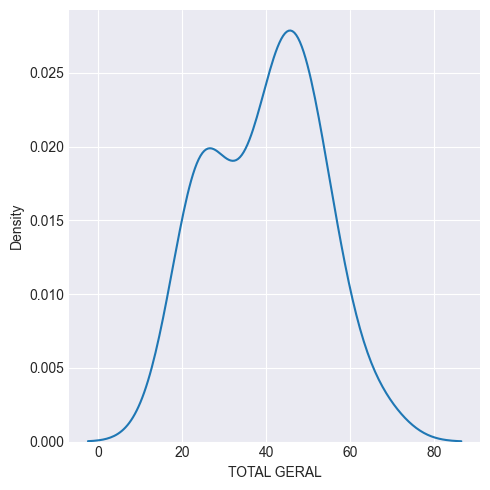

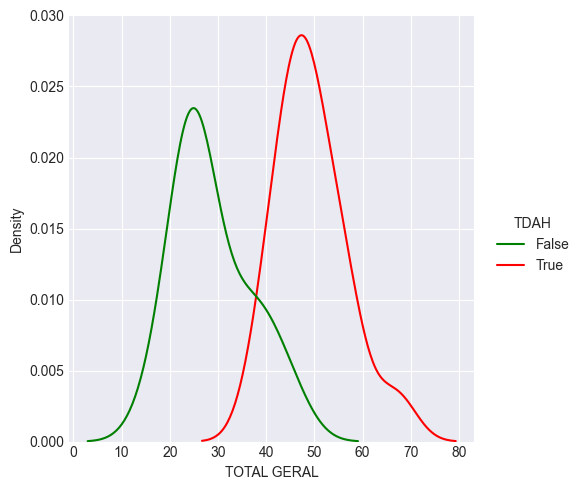

In [65]:
sns.displot(df,x='TOTAL GERAL', kind = 'kde')
sns.displot(df,x='TOTAL GERAL', hue = 'TDAH', palette = ['green','red'], kind = 'kde')

## Diferença entre grupos de sintomas A e B
* Máxima diferença entre totais = 9*4 - 0 = 36

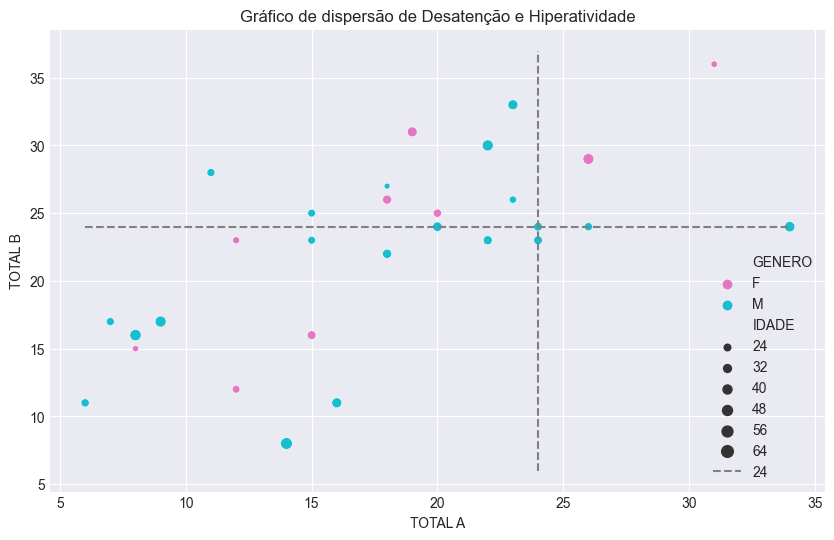

In [66]:
plt.figure(figsize=(10,6))
sns.scatterplot(df, x = 'TOTAL A', y = 'TOTAL B', hue = 'GENERO', size = 'IDADE', palette = ['C6','C9'])
plt.title('Gráfico de dispersão de Desatenção e Hiperatividade')
plt.hlines(24,6,34, color='grey',linestyles='--', label = '24')
plt.vlines(24,6,37, color='grey',linestyles='--')
plt.legend(loc='lower right')

- Todos os pacientes com mais de 24 em A tem mais de 24 em B
- Os pacientes que pontuaram acima de 24 tanto em A quanto em B são do gênero feminino

Text(0.5, 1.0, 'Correlação positiva forte entre Total A e Total B')

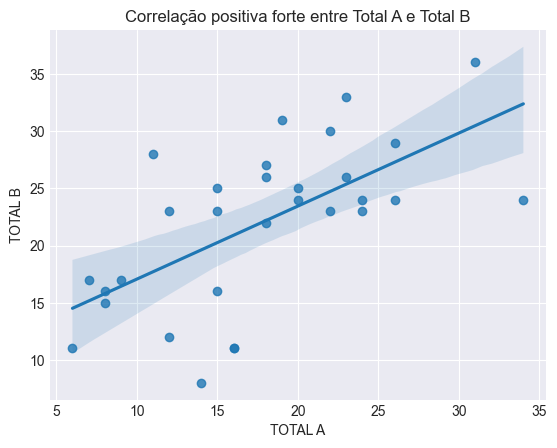

In [67]:
sns.regplot(df, x = 'TOTAL A', y = 'TOTAL B')
plt.title('Correlação positiva forte entre Total A e Total B')

### Distribuições A e B

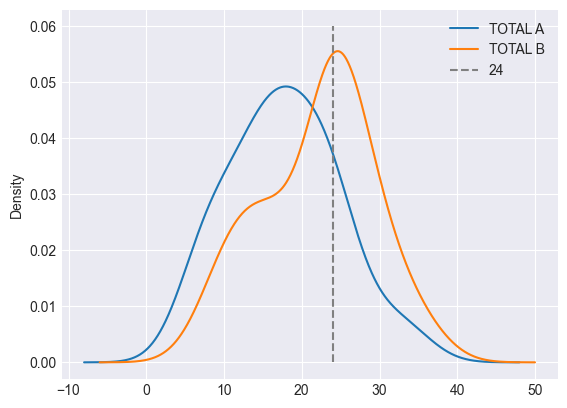

In [68]:
ax = df[['TOTAL A','TOTAL B']].plot.kde()
ax.vlines(24, ymin = 0, ymax = 0.06, color = 'grey', linestyle = '--',label = '24')
ax.legend()

Distribuição das diferenças entre A e B em cada paciente

73.3% pontuaram mais em B do que em A


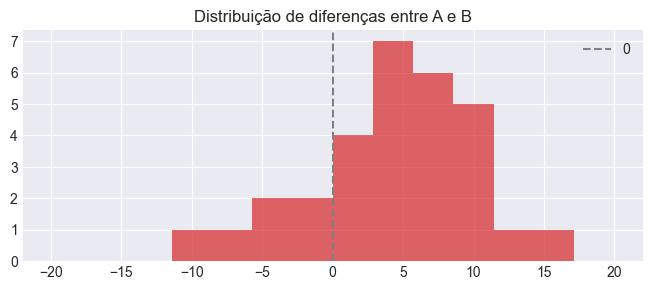

In [69]:
b_minus_a = df['TOTAL B'] - df['TOTAL A']
b_greater_than_a = (b_minus_a>0).sum()*100/len(b_minus_a)
print(f'{b_greater_than_a:.1f}% pontuaram mais em B do que em A')
# hist
bin_range = np.linspace(-20, 20, 15)
fig,ax = plt.subplots(figsize=(8,3))
plt.title('Distribuição de diferenças entre A e B')
plt.hist(b_minus_a, bins = bin_range, alpha=0.7, color = 'C3')
ax.vlines(0, ymin = 0, ymax = 1, color = 'grey', linestyle = '--',transform=ax.get_xaxis_transform(), label = '0')
plt.legend()
plt.show()

Casos com maior diferença entre A e B

In [70]:
# maior diferença com B > A
id_max = b_minus_a.argmax()
df.iloc[id_max]

ID                   23
IDADE                33
GENERO                M
A1                    0
A2                    0
A3                    2
A4                    3
A5                    0
A6                    1
A7                    0
A8                    4
A9                    1
B1                    4
B2                    4
B3                    4
B4                    4
B5                    4
B6                    4
B7                    3
B8                    0
B9                    1
TOTAL A              11
TOTAL B              28
TOTAL GERAL          39
STD_A          1.481366
STD_B          1.536591
STD_GERAL      1.757338
TDAH               True
Name: 22, dtype: object

In [71]:
# maior diferença com B < A
id_max = b_minus_a.argmin()
df.iloc[id_max]

ID                   25
IDADE                51
GENERO                M
A1                    4
A2                    4
A3                    4
A4                    4
A5                    4
A6                    4
A7                    4
A8                    4
A9                    2
B1                    4
B2                    3
B3                    3
B4                    2
B5                    2
B6                    1
B7                    1
B8                    4
B9                    4
TOTAL A              34
TOTAL B              24
TOTAL GERAL          58
STD_A          0.666667
STD_B          1.224745
STD_GERAL      1.114374
TDAH               True
Name: 24, dtype: object

### Distribuição dos somatórios

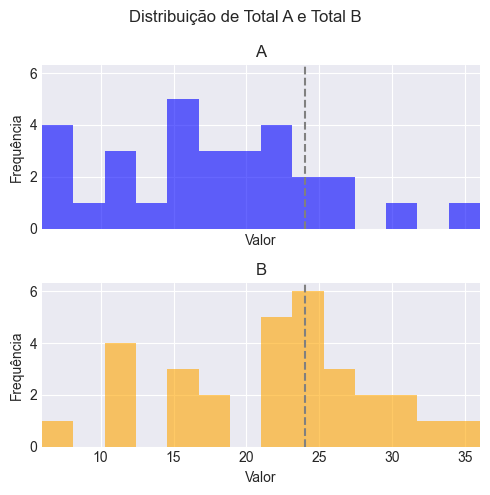

In [72]:
data_1 = df['TOTAL A']
data_2 = df['TOTAL B']

# Determine common bin range for both datasets
min_val = min(min(data_1), min(data_2))
max_val = max(max(data_1), max(data_2))
bin_range = np.linspace(min_val, max_val, 15)

# Creating subplots for the histograms
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(5, 5), sharex='col', sharey='col')
fig.suptitle('Distribuição de Total A e Total B')

# Plotting histogram for variable 1 on the first subplot (ax1)
ax1.hist(data_1, bins=bin_range, color='blue', alpha=0.6)
ax1.vlines(24, ymin = 0, ymax = 1, color = 'grey', linestyle = '--',transform=ax1.get_xaxis_transform())
ax1.set_title('A')
ax1.set_xlabel('Valor')
ax1.set_ylabel('Frequência')

# Plotting histogram for variable 2 on the second subplot (ax2)
ax2.hist(data_2, bins=bin_range, color='orange', alpha=0.6)
ax2.vlines(24, ymin = 0, ymax = 1, color = 'grey', linestyle = '--',transform=ax2.get_xaxis_transform())
ax2.set_title('B')
ax2.set_xlabel('Valor')
ax2.set_ylabel('Frequência')

# Set the same x-axis range for both subplots
ax1.set_xlim(min_val, max_val)
ax2.set_xlim(min_val, max_val)

# Displaying the histograms
plt.tight_layout()
plt.show()

### Média e somatórios

In [73]:
ab_mean = df[['TOTAL B','TOTAL A']].mean()
ab_std = df[['TOTAL B','TOTAL A']].std()

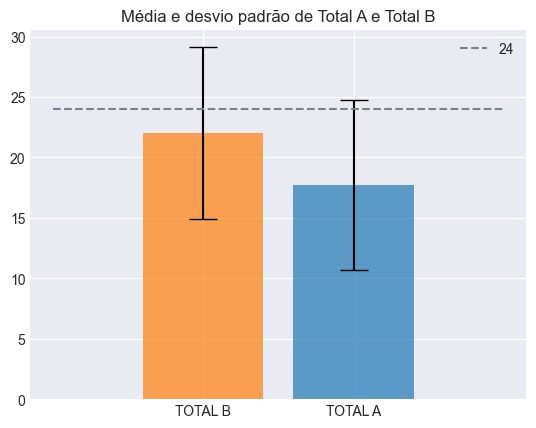

In [74]:
fig, ax = plt.subplots()
x_pos = ab_mean.index
ax.bar(x_pos, ab_mean.values, yerr=ab_std.values, align='center', alpha=0.7, color = ['C1','C0'], ecolor='black', capsize=10)
ax.hlines(y=24, xmin=-1, xmax=2, colors='grey', linestyles='--', label = '24')
ax.set_title('Média e desvio padrão de Total A e Total B')
ax.legend()

In [157]:
def cohen(group1, group2):
    """Computes Cohen's effect size for two groups.
    
    group1: Series or DataFrame
    group2: Series or DataFrame
    
    returns: float if the arguments are Series;
             Series if the arguments are DataFrames
    """
    diff = group1.mean() - group2.mean()

    var1 = group1.var()
    var2 = group2.var()
    n1, n2 = len(group1), len(group2)

    pooled_var = (n1 * var1 + n2 * var2) / (n1 + n2)
    d = diff / np.sqrt(pooled_var)
    return d

d_cohen_ab = cohen(df['TOTAL B'],df['TOTAL A'])
print(f'Tamanho de efeito (d de Cohen): {d_cohen_ab:.2f} (Médio)')


Tamanho de efeito (d de Cohen): 0.60 (Médio)


Diferença entre o somatório de total B e total A: 128 (24.1% de A)


Text(0.5, 1.0, 'Somatório de Total A e Total B')

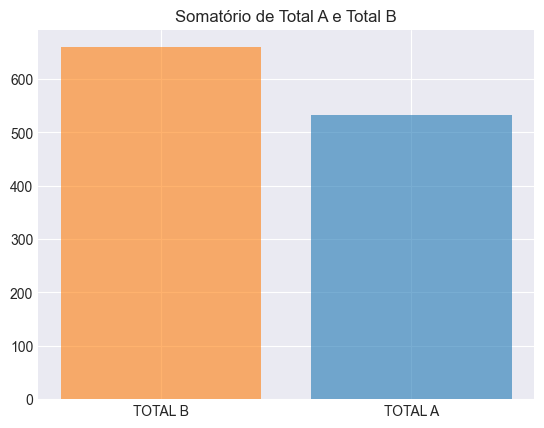

In [75]:
total_ab_points = df[['TOTAL A', 'TOTAL B']].sum().sort_values(ascending=False)
diff_ab = total_ab_points['TOTAL B'] - total_ab_points['TOTAL A']
diff_relative = diff_ab*100/total_ab_points['TOTAL A']
print(f'Diferença entre o somatório de total B e total A: {diff_ab} ({diff_relative:.1f}% de A)')
#plt.figure(figsize = (8, 3))
plt.bar(x = total_ab_points.index, height = total_ab_points.values, alpha = 0.6, color = ['C1','C0']) #width=0.3
plt.title('Somatório de Total A e Total B')

## Análise de sintomas

### Sintomas com maior somatório

<BarContainer object of 22 artists>

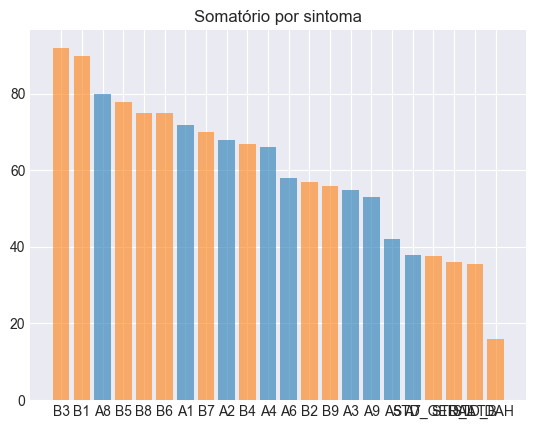

In [76]:
# somatório faz sentido por se tratar de escala likert?
questions_points = df.drop(['ID','IDADE','GENERO','TOTAL GERAL', 'TOTAL A', 'TOTAL B'],axis=1).sum().sort_values(ascending=False)
symptom_type = [s[0] for s in questions_points.index]
colors = ['C0' if s=='A' else 'C1' for s in symptom_type]
plt.title('Somatório por sintoma')
plt.bar(x = questions_points.index, height = questions_points.values, alpha = 0.6, color = colors)

### Moda de cada sintoma

In [77]:
questions_modes = df.drop(['ID','IDADE','GENERO','TOTAL GERAL', 'TOTAL A', 'TOTAL B'],axis=1).mode()
questions_modes

,A1,A2,A3,A4,A5,A6,A7,A8,A9,B1,...,B4,B5,B6,B7,B8,B9,STD_A,STD_B,STD_GERAL,TDAH
0,2.0,2,1.0,3.0,0.0,1.0,0.0,4.0,1.0,4.0,...,4.0,4.0,4.0,2.0,4.0,0.0,1.118034,1.0,1.262843,True
1,NaN,3,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [78]:
questions_modes.at[0,'A2']=4

A2 possui 3 modas

<BarContainer object of 22 artists>

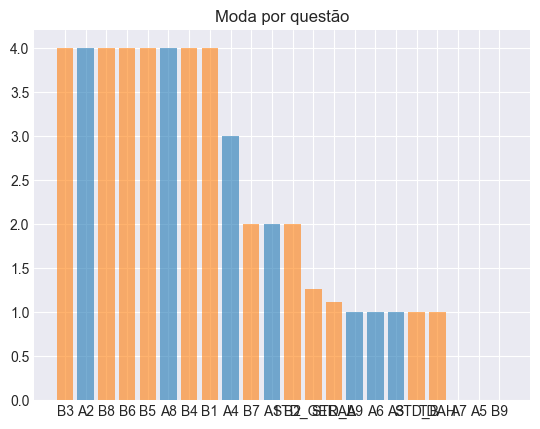

In [79]:
ordered_modes = questions_modes.iloc[0].sort_values(ascending=False)
symptom_type = [s[0] for s in ordered_modes.index]
colors = ['C0' if s=='A' else 'C1' for s in symptom_type]
plt.title('Moda por questão')
plt.bar(x = ordered_modes.index, height = ordered_modes.values, alpha = 0.6, color = colors)

5 dos 6 sintomas mais que mais pontuaram 4 são do tipo B. Todos sintomas cuja pontuação mais frequente é 1 e 0 são A.

### Contagem por valor

<BarContainer object of 22 artists>

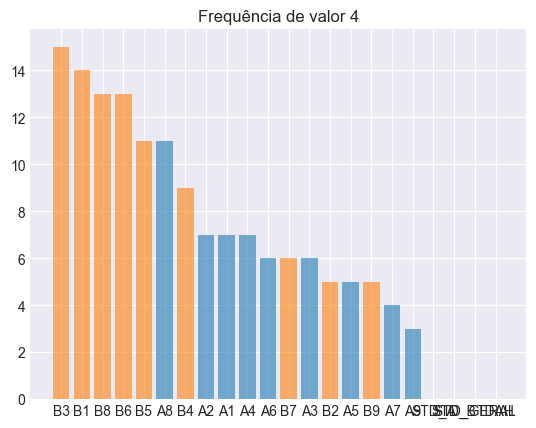

In [80]:
# contagem de 4
df_questions = df.drop(['ID','IDADE','GENERO','TOTAL GERAL', 'TOTAL A', 'TOTAL B'],axis=1)
df_count_4 = (df_questions==4).sum().sort_values(ascending=False)
symptom_type = [s[0] for s in df_count_4.index]
colors = ['C0' if s=='A' else 'C1' for s in symptom_type]
plt.title('Frequência de valor 4')
plt.bar(x = df_count_4.index, height = df_count_4.values, alpha = 0.6, color = colors)

<BarContainer object of 22 artists>

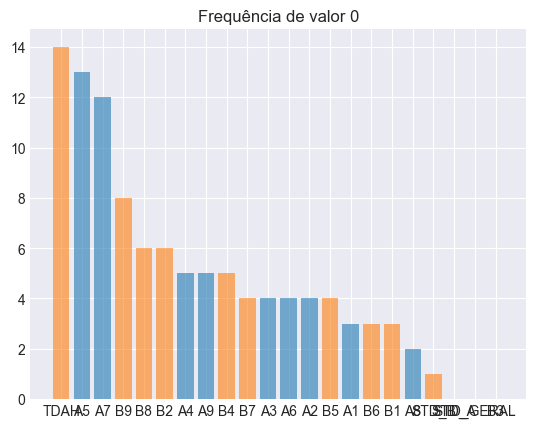

In [81]:
# contagem de 0
df_questions = df.drop(['ID','IDADE','GENERO','TOTAL GERAL', 'TOTAL A', 'TOTAL B'],axis=1)
df_count_4 = (df_questions==0).sum().sort_values(ascending=False)
symptom_type = [s[0] for s in df_count_4.index]
colors = ['C0' if s=='A' else 'C1' for s in symptom_type]
plt.title('Frequência de valor 0')
plt.bar(x = df_count_4.index, height = df_count_4.values, alpha = 0.6, color = colors)

<BarContainer object of 22 artists>

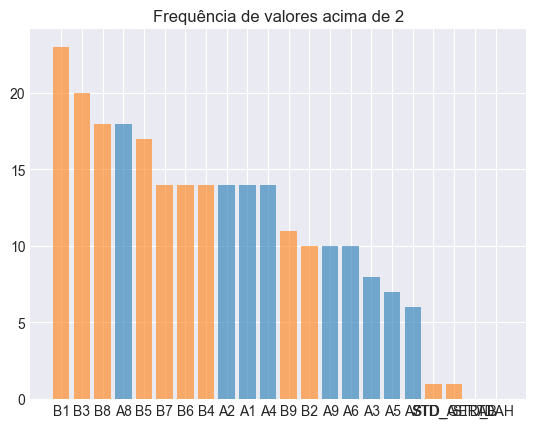

In [82]:
# contagem de valores acima de 2
df_questions = df.drop(['ID','IDADE','GENERO','TOTAL GERAL', 'TOTAL A', 'TOTAL B'],axis=1)
df_count_4 = (df_questions>2).sum().sort_values(ascending=False)
symptom_type = [s[0] for s in df_count_4.index]
colors = ['C0' if s=='A' else 'C1' for s in symptom_type]
plt.title('Frequência de valores acima de 2')
plt.bar(x = df_count_4.index, height = df_count_4.values, alpha = 0.6, color = colors)

<BarContainer object of 22 artists>

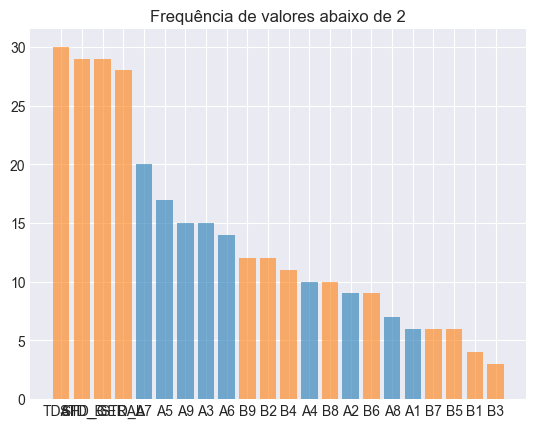

In [83]:
# contagem de valores abaixo de 2
df_questions = df.drop(['ID','IDADE','GENERO','TOTAL GERAL', 'TOTAL A', 'TOTAL B'],axis=1)
df_count_4 = (df_questions<2).sum().sort_values(ascending=False)
symptom_type = [s[0] for s in df_count_4.index]
colors = ['C0' if s=='A' else 'C1' for s in symptom_type]
plt.title('Frequência de valores abaixo de 2')
plt.bar(x = df_count_4.index, height = df_count_4.values, alpha = 0.6, color = colors)

### Sintomas com maior variância

<BarContainer object of 22 artists>

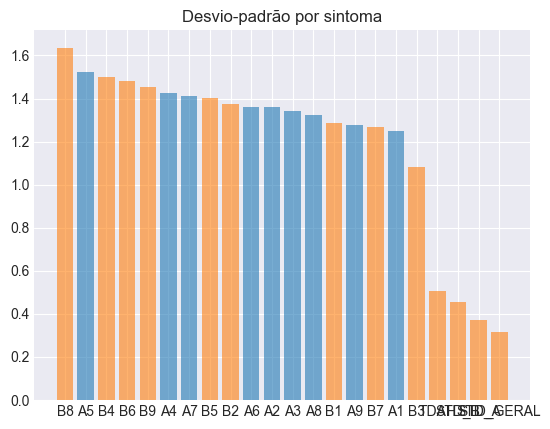

In [84]:
df_questions = df.drop(['ID','IDADE','GENERO','TOTAL GERAL', 'TOTAL A', 'TOTAL B'],axis=1)
df_count_4 = df_questions.std().sort_values(ascending=False)
symptom_type = [s[0] for s in df_count_4.index]
colors = ['C0' if s=='A' else 'C1' for s in symptom_type]
plt.title('Desvio-padrão por sintoma')
plt.bar(x = df_count_4.index, height = df_count_4.values, alpha = 0.6, color = colors)

### Distribuição por sintomas

Text(0.5, 1.0, 'Distribuição de A')

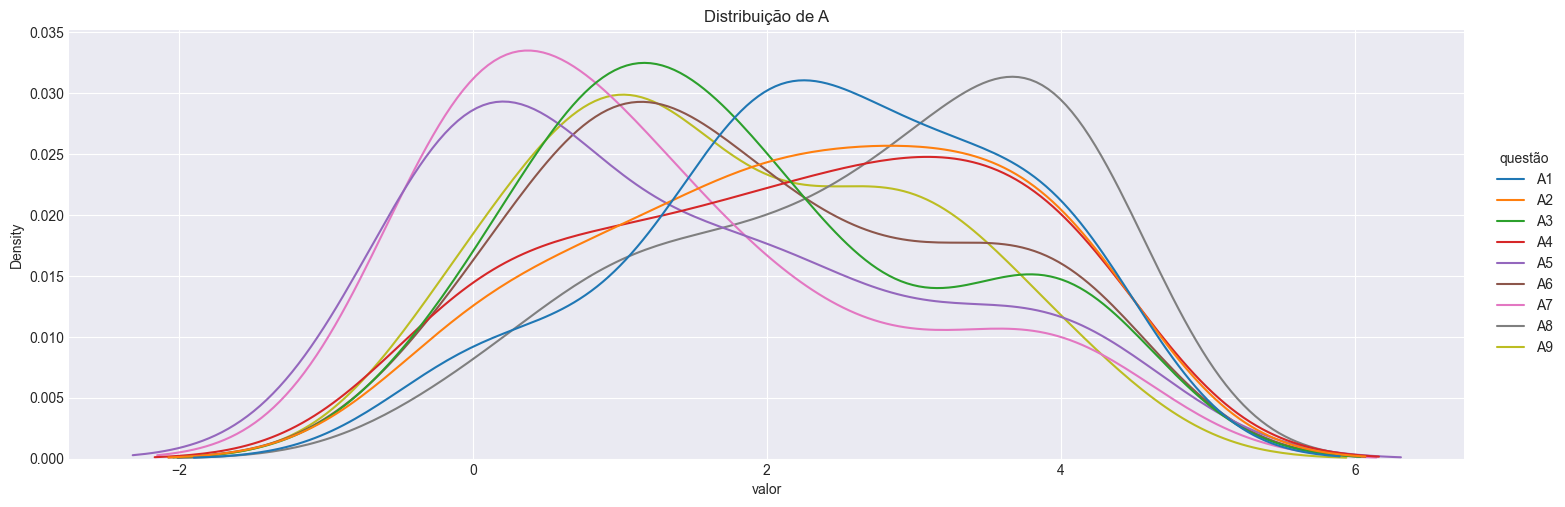

In [85]:
a_questions = [c for c in df.columns if c.startswith('A')]
question_name = []
value = []
for a_question in a_questions:
    l = list(df[a_question])
    value += l
    question_name += [a_question]*len(l)
df_a = pd.DataFrame({'questão':question_name, 'valor':value})
sns.displot(df_a, x = 'valor', hue = 'questão', kind = 'kde', height=5, aspect=3)
plt.title("Distribuição de A")
    

Text(0.5, 1.0, 'Distribuição de B')

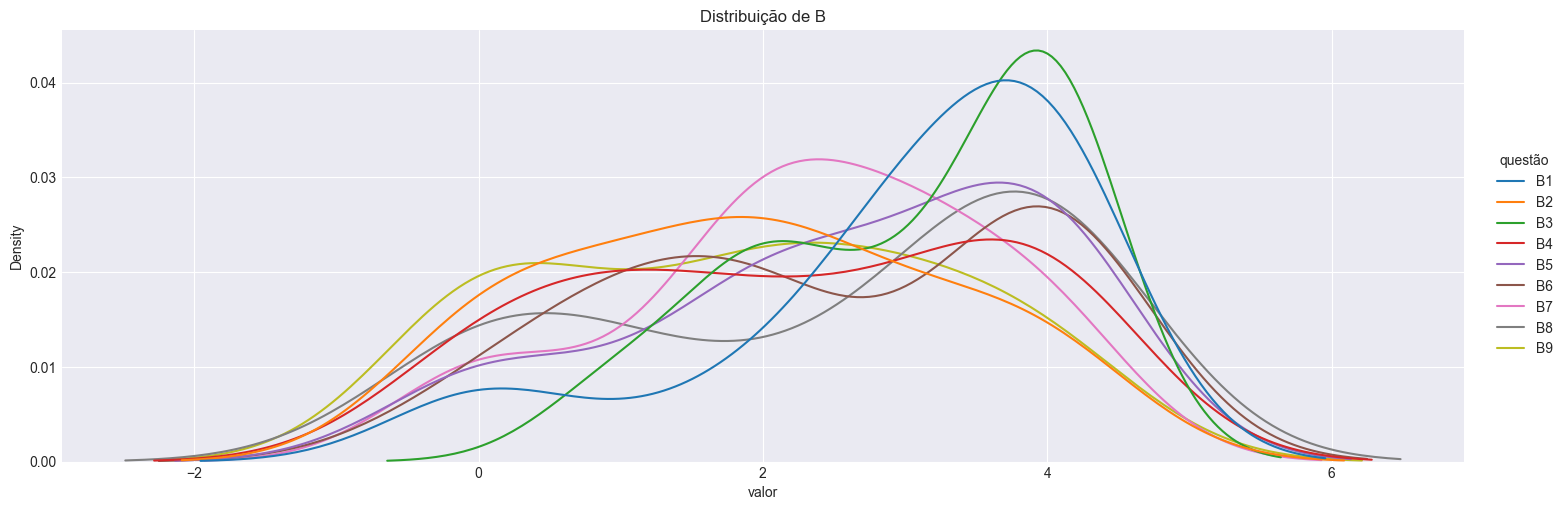

In [86]:
b_questions = [c for c in df.columns if c.startswith('B')]
question_name = []
value = []
for a_question in b_questions:
    l = list(df[a_question])
    value += l
    question_name += [a_question]*len(l)
df_a = pd.DataFrame({'questão':question_name, 'valor':value})
sns.displot(df_a, x = 'valor', hue = 'questão', kind = 'kde', height=5, aspect=3)
plt.title("Distribuição de B")

# Correlação

<Axes: >

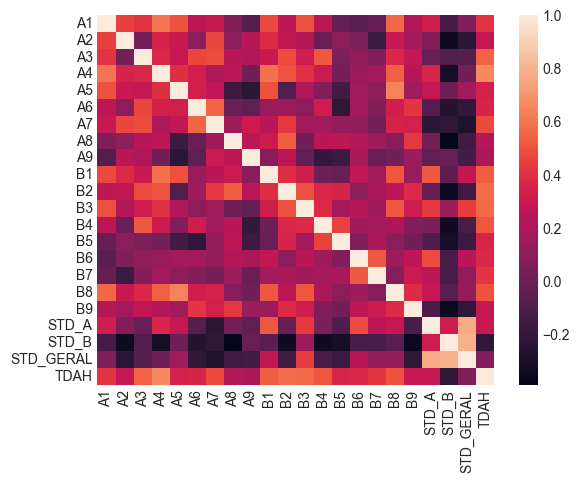

In [87]:
sns.heatmap(df_questions.corr())

<Axes: >

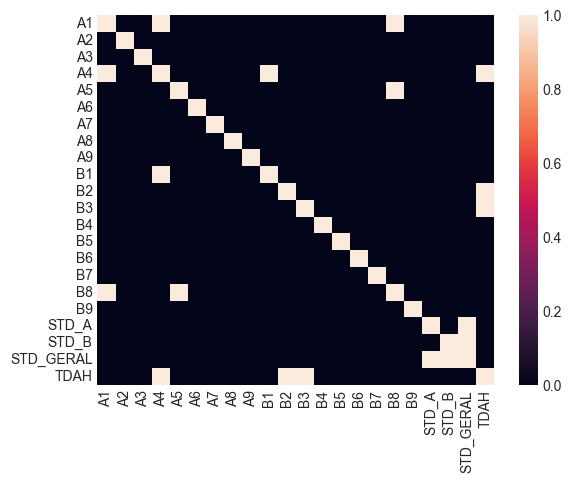

In [88]:
# correlação positiva
sns.heatmap(df_questions.corr() > 0.55)

<Axes: >

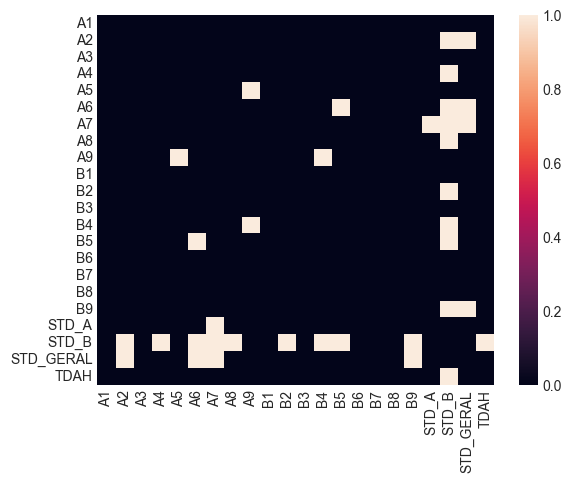

In [89]:
# correlação negativa
sns.heatmap(df_questions.corr() < -0.20)

Correlação positiva (> 0.55)
- A1 e A4
- A1 e B8
- A5 e B8
- A4 e B1

Fraca correlação negativa (< -0.2)
- A5 e A9
- A6 e B5
- A9 e B4

In [90]:
correlated = ['A1','A4','A5','A6','A9','B1','B5','B8']

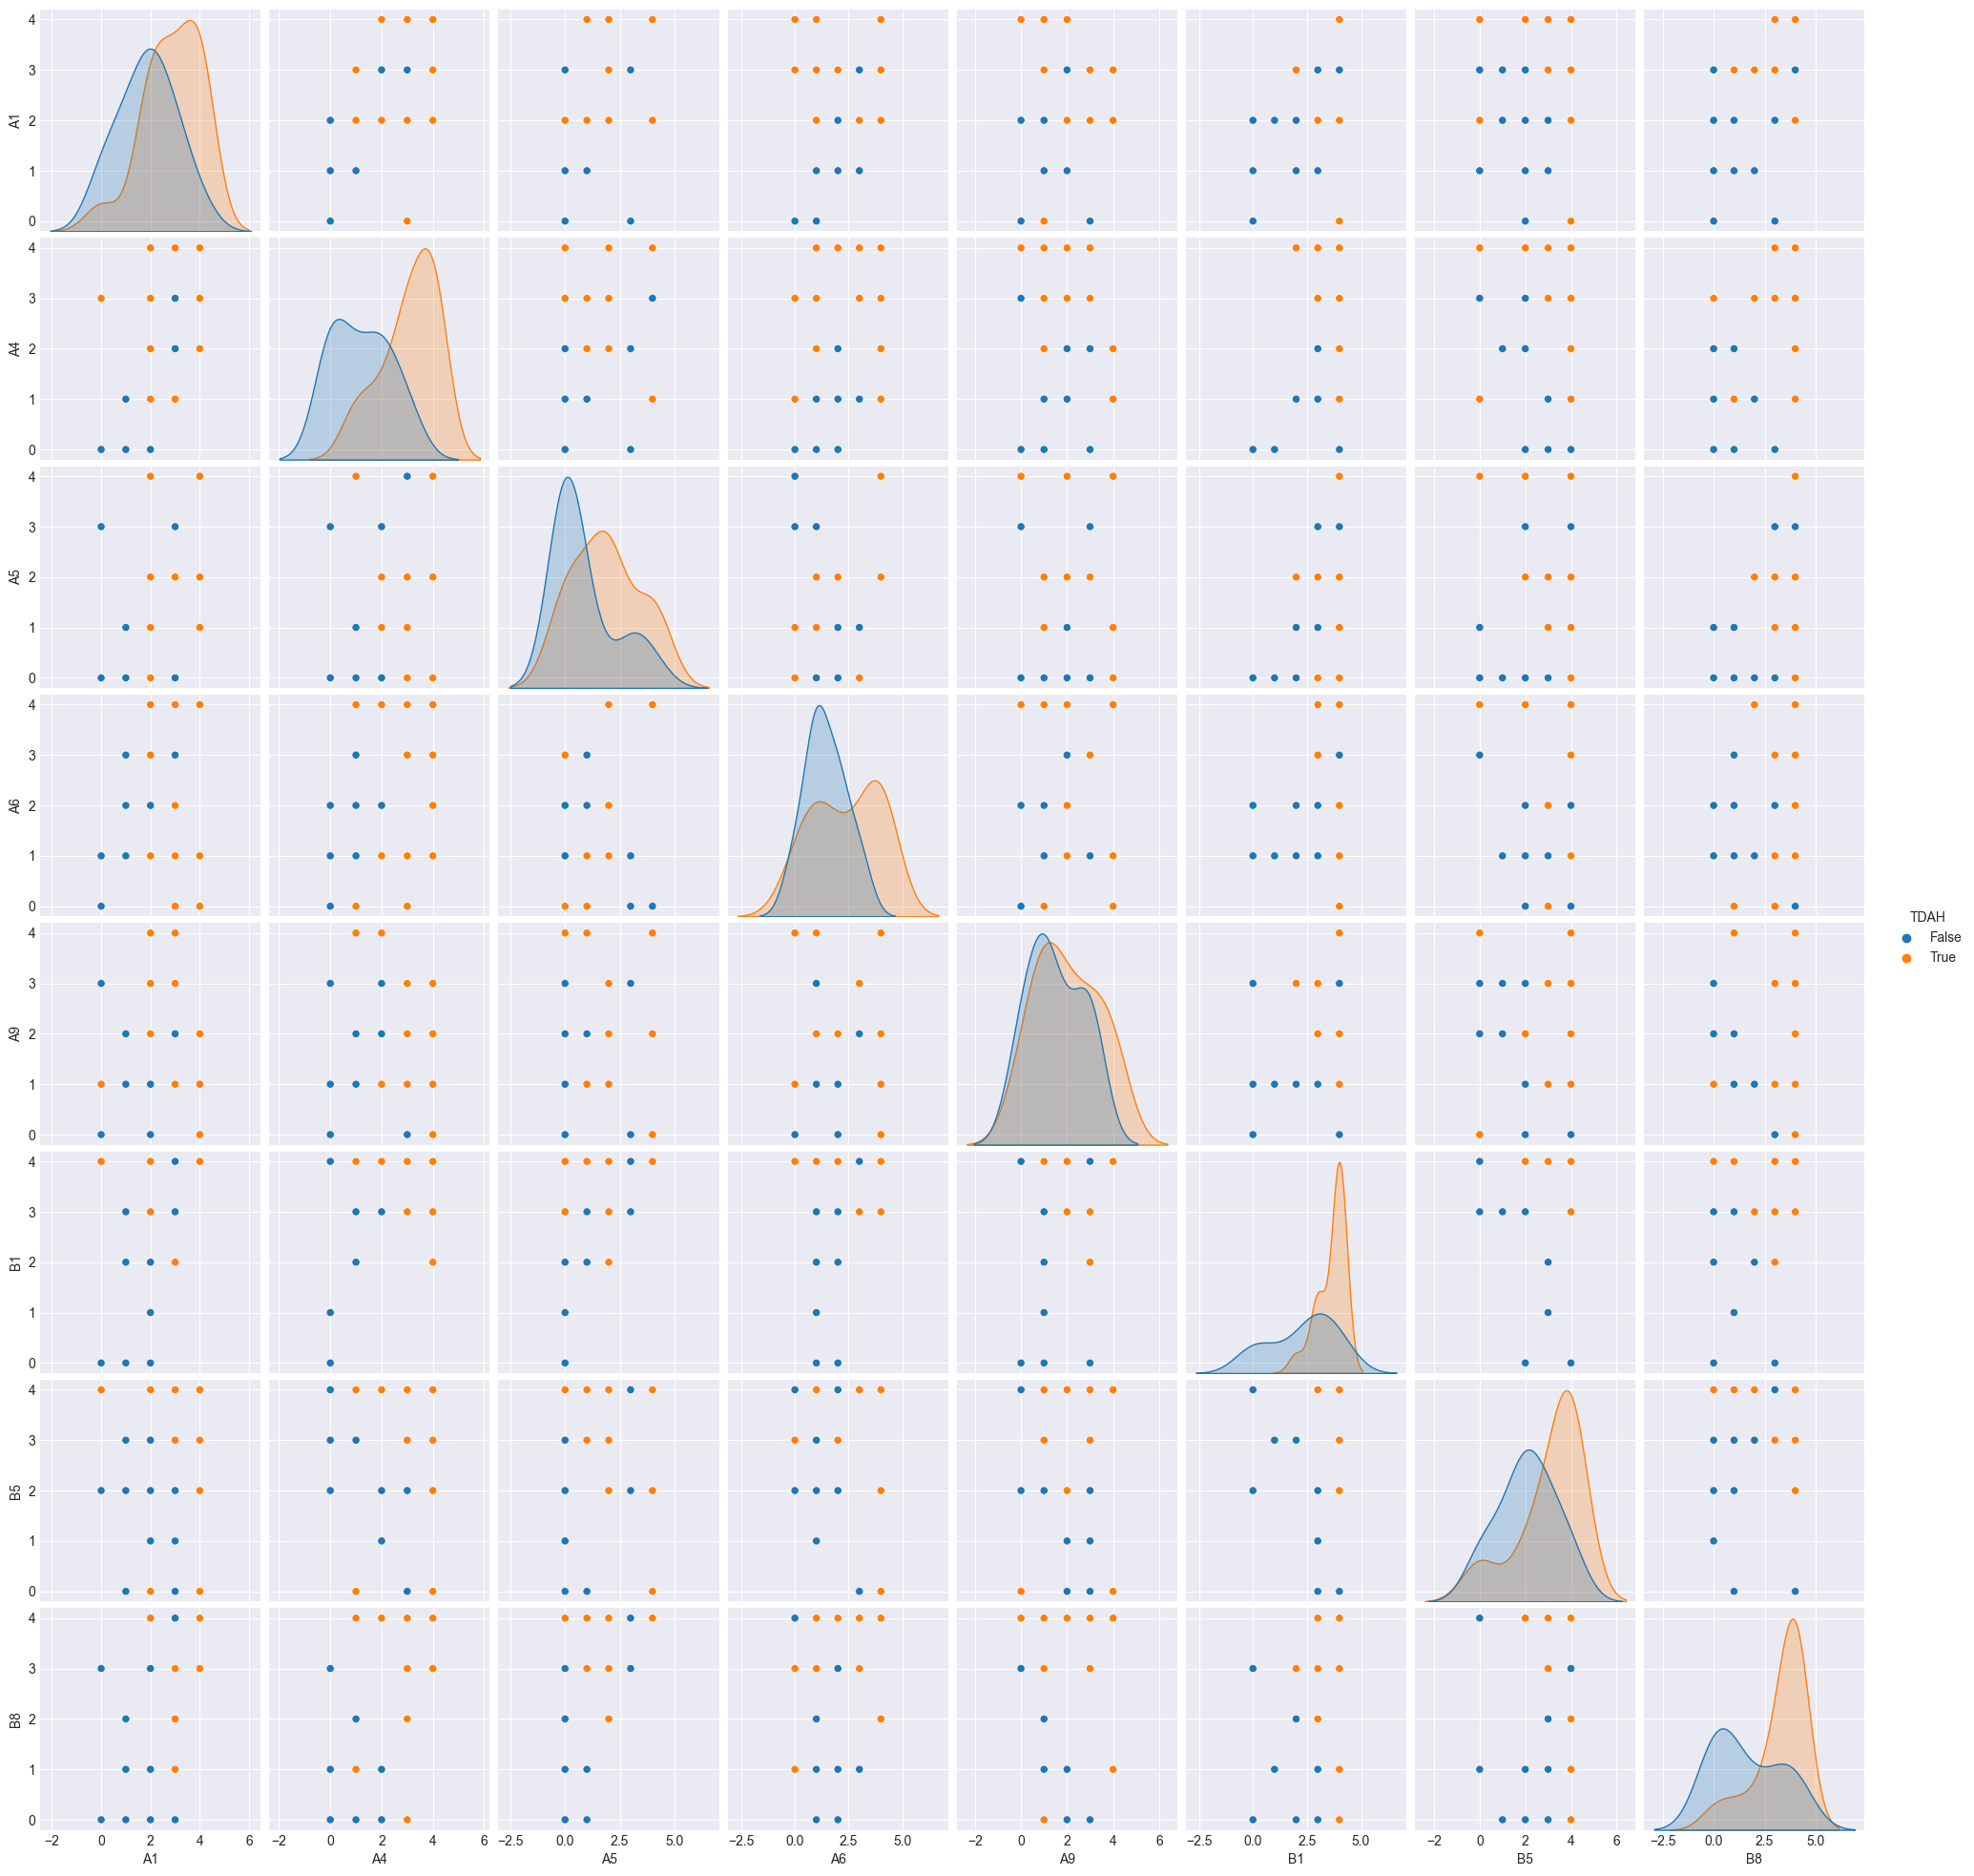

In [91]:
sns.pairplot(df[correlated + ['TDAH']], hue="TDAH")

## Gênero

### Total geral

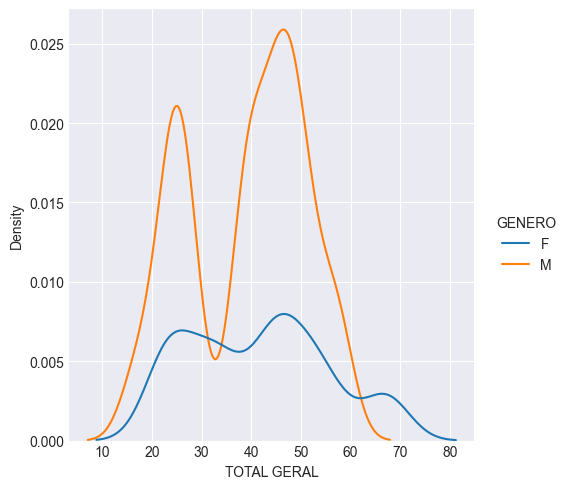

In [92]:
# total geral
sns.displot(df, x="TOTAL GERAL", hue="GENERO", kind="kde", bw_adjust=.5)

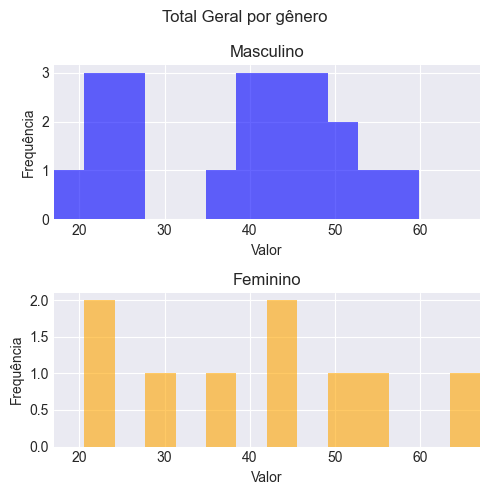

In [93]:
data_m = df[df['GENERO']=='M']['TOTAL GERAL']
data_f = df[df['GENERO']=='F']['TOTAL GERAL']

# Determine common bin range for both datasets
min_val = min(min(data_m), min(data_f))
max_val = max(max(data_m), max(data_f))
bin_range = np.linspace(min_val, max_val, 15)

# Creating subplots for the histograms
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(5, 5))
fig.suptitle('Total Geral por gênero')

# Plotting histogram for variable 1 on the first subplot (ax1)
ax1.hist(data_m, bins=bin_range, color='blue', alpha=0.6)
ax1.set_title('Masculino')
ax1.set_xlabel('Valor')
ax1.set_ylabel('Frequência')

# Plotting histogram for variable 2 on the second subplot (ax2)
ax2.hist(data_f, bins=bin_range, color='orange', alpha=0.6)
ax2.set_title('Feminino')
ax2.set_xlabel('Valor')
ax2.set_ylabel('Frequência')

# Set the same x-axis range for both subplots
ax1.set_xlim(min_val, max_val)
ax2.set_xlim(min_val, max_val)

# Displaying the histograms
plt.tight_layout()
plt.show()

### Total A e Total B

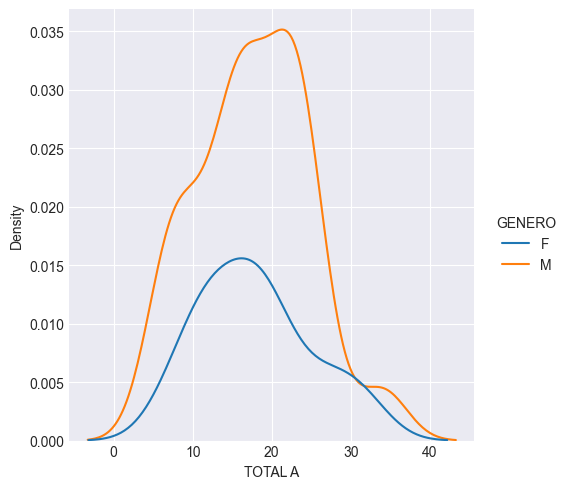

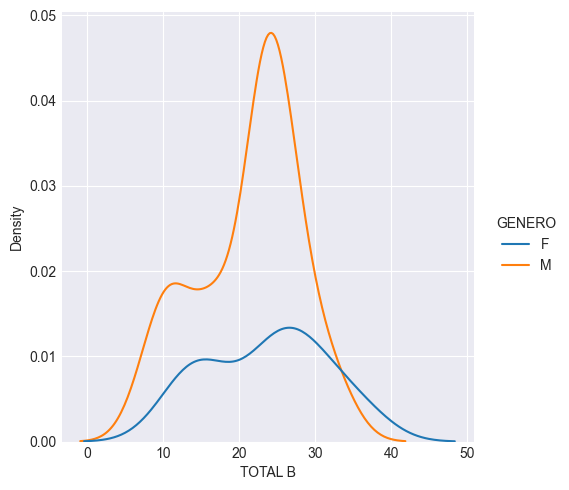

In [94]:
sns.displot(df, x="TOTAL A", hue="GENERO", kind="kde", bw_adjust=.8)
sns.displot(df, x="TOTAL B", hue="GENERO", kind="kde", bw_adjust=.8)

### Idade

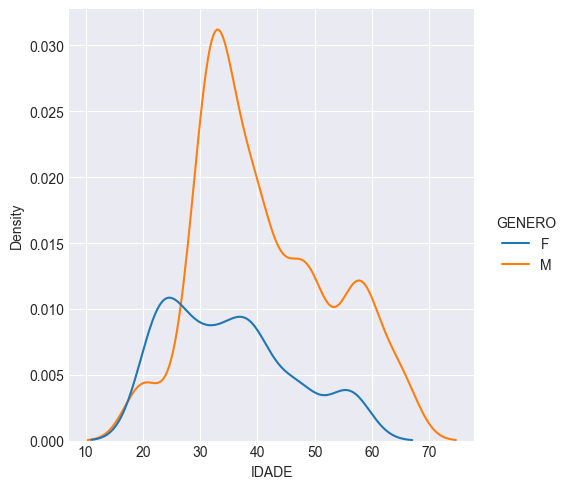

In [95]:
# idade
sns.displot(df, x="IDADE", hue="GENERO", kind="kde", bw_adjust=.5)

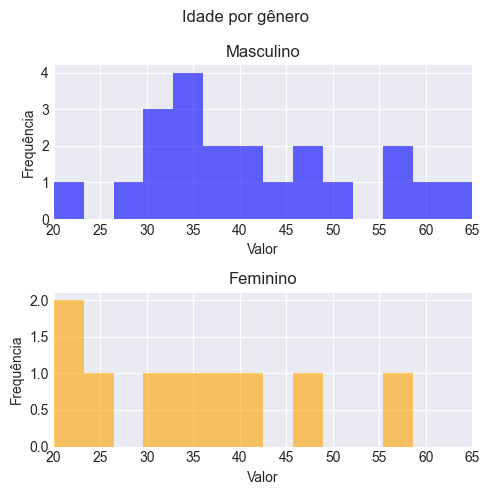

In [96]:
data_m = df[df['GENERO']=='M']['IDADE']
data_f = df[df['GENERO']=='F']['IDADE']

# Determine common bin range for both datasets
min_val = min(min(data_m), min(data_f))
max_val = max(max(data_m), max(data_f))
bin_range = np.linspace(min_val, max_val, 15)

# Creating subplots for the histograms
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(5, 5))
fig.suptitle('Idade por gênero')

# Plotting histogram for variable 1 on the first subplot (ax1)
ax1.hist(data_m, bins=bin_range, color='blue', alpha=0.6)
ax1.set_title('Masculino')
ax1.set_xlabel('Valor')
ax1.set_ylabel('Frequência')

# Plotting histogram for variable 2 on the second subplot (ax2)
ax2.hist(data_f, bins=bin_range, color='orange', alpha=0.6)
ax2.set_title('Feminino')
ax2.set_xlabel('Valor')
ax2.set_ylabel('Frequência')

# Set the same x-axis range for both subplots
ax1.set_xlim(min_val, max_val)
ax2.set_xlim(min_val, max_val)

# Displaying the histograms
plt.tight_layout()
plt.show()

# Análise de pacientes

In [97]:
# pacientes com indicação de TDAH
df_tdah = df[df['TDAH']]
print(f'porcentagem de pacientes possivelmente com TDAH: {len(df_tdah)*100/len(df):.2f}%')
df_tdah

porcentagem de pacientes possivelmente com TDAH: 53.33%


,ID,IDADE,GENERO,A1,A2,A3,A4,A5,A6,A7,...,B7,B8,B9,TOTAL A,TOTAL B,TOTAL GERAL,STD_A,STD_B,STD_GERAL,TDAH
2,3,44,M,4,0,4,4,4,4,0,...,4,4,0,20,24,44,2.108185,2.000000,2.006525,True
3,4,38,M,3,4,2,3,2,4,3,...,3,2,1,24,24,48,1.000000,1.000000,0.970143,True
7,8,23,F,4,4,3,4,4,4,4,...,4,4,4,31,36,67,1.333333,0.000000,0.958280,True
9,10,34,F,2,4,1,4,0,3,1,...,3,3,2,20,25,45,1.394433,0.666667,1.098127,True
10,11,40,F,3,3,2,1,0,0,3,...,4,1,0,18,26,44,1.414214,1.691482,1.580105,True
11,12,34,M,2,4,2,1,4,4,4,...,2,4,4,26,24,50,1.364225,1.658312,1.477500,True
12,13,47,F,3,2,0,4,2,2,1,...,4,4,3,19,31,50,1.364225,0.726483,1.262843,True
14,15,20,M,2,3,1,4,2,2,0,...,3,4,3,18,27,45,1.118034,1.000000,1.150447,True
16,17,56,F,4,4,4,3,2,1,2,...,2,4,2,26,29,55,1.166667,1.201850,1.161754,True
21,22,28,M,2,2,2,3,0,3,4,...,2,4,2,23,26,49,1.236033,0.927961,1.074055,True


In [98]:
tdah_ids = list(df_tdah['ID'])

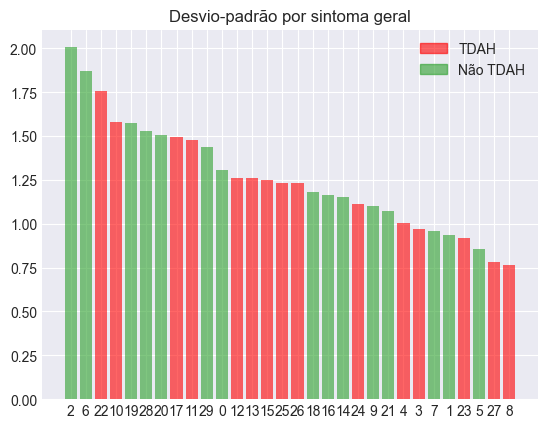

In [99]:
df_questions.index = df['ID']
std_patients = df['STD_GERAL']
std_patients = std_patients.sort_values(ascending=False)
x = [str(s) for s in std_patients.index]
tdah_colors = ['red' if int(s) in tdah_ids else 'C2' for s in x]
plt.title('Desvio-padrão por sintoma geral')
plt.bar(x = x, height = std_patients.values, alpha = 0.6, color = tdah_colors)
colors = {'TDAH':'red', 'Não TDAH':'C2'}         
labels = list(colors.keys())
handles = [plt.Rectangle((0,0),1,1, color=colors[label], alpha = 0.6) for label in labels]
plt.legend(handles, labels)

In [100]:
# maior variância: é 8 ou 80
print(df[df['ID']==std_patients.index[std_patients.argmax()]][['ID','GENERO','IDADE', 'TOTAL A', 'TOTAL B', 'TOTAL GERAL']])
df[df['ID']==std_patients.index[std_patients.argmax()]][df_questions.columns]

   ID GENERO  IDADE  TOTAL A  TOTAL B  TOTAL GERAL
1   2      M     34        6       11           17


,A1,A2,A3,A4,A5,A6,A7,A8,A9,B1,...,B4,B5,B6,B7,B8,B9,STD_A,STD_B,STD_GERAL,TDAH
1,1,0,1,0,0,2,0,1,1,0,...,3,2,0,2,0,1,0.707107,1.092906,0.937595,False


In [101]:
# menor variância
print(df[df['ID']==std_patients.index[std_patients.argmin()]][['ID','GENERO','IDADE', 'TOTAL A', 'TOTAL B', 'TOTAL GERAL']])
df[df['ID']==std_patients.index[std_patients.argmin()]][df_questions.columns]

   ID GENERO  IDADE  TOTAL A  TOTAL B  TOTAL GERAL
7   8      F     23       31       36           67


,A1,A2,A3,A4,A5,A6,A7,A8,A9,B1,...,B4,B5,B6,B7,B8,B9,STD_A,STD_B,STD_GERAL,TDAH
7,4,4,3,4,4,4,4,4,0,4,...,4,4,4,4,4,4,1.333333,0.0,0.95828,True


### Variância de A's

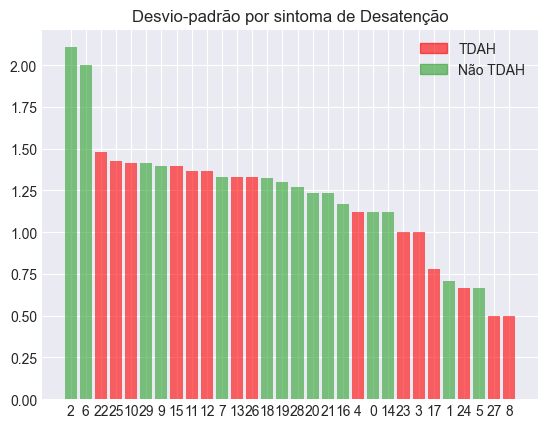

In [102]:
df_questions.index = df['ID']
std_patients = df['STD_A']
std_patients = std_patients.sort_values(ascending=False)
x = [str(s) for s in std_patients.index]
tdah_colors = ['red' if int(s) in tdah_ids else 'C2' for s in x]
plt.title('Desvio-padrão por sintoma de Desatenção')
plt.bar(x = x, height = std_patients.values, alpha = 0.6, color = tdah_colors)
colors = {'TDAH':'red', 'Não TDAH':'C2'}         
labels = list(colors.keys())
handles = [plt.Rectangle((0,0),1,1, color=colors[label], alpha = 0.6) for label in labels]
plt.legend(handles, labels)

### Variância de B's

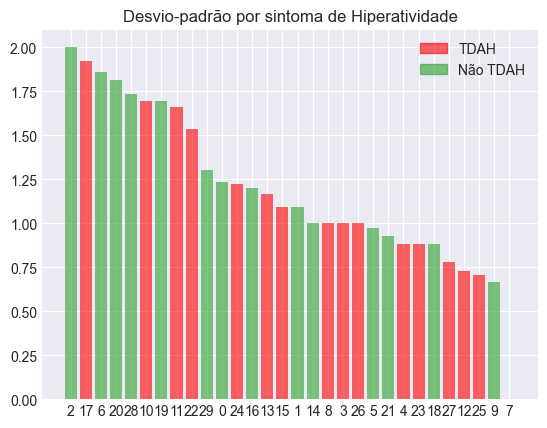

In [103]:
df_questions.index = df['ID']
std_patients = df['STD_B']
std_patients = std_patients.sort_values(ascending=False)
x = [str(s) for s in std_patients.index]
tdah_colors = ['red' if int(s) in tdah_ids else 'C2' for s in x]
plt.title('Desvio-padrão por sintoma de Hiperatividade')
plt.bar(x = x, height = std_patients.values, alpha = 0.6, color = tdah_colors)
colors = {'TDAH':'red', 'Não TDAH':'C2'}         
labels = list(colors.keys())
handles = [plt.Rectangle((0,0),1,1, color=colors[label], alpha = 0.6) for label in labels]
plt.legend(handles, labels)

# Inferência
- Teste de hipótese da média populacional de dependentes químicos
- Inferência bayesiana de p(d|tdah)
- De acordo com a Associação Brasileira do Déficit de Atenção - ABDA, o número de casos de TDAH variam entre 5% e 8% a nível mundial

### Inferência bayesiana

In [104]:
# naive
likelihood = df['TDAH'].sum()/len(df)
marginal = 0.08
prior = 0.06
posterior = likelihood*prior/marginal
posterior

0.4

Com base nas presuposições assumidas e na evidência observada:
- 100.00% de chance que pacientes com TDAH tenham maior prevalência de dependência química do que a população geral
- 87.56% de chance de que a prevalência de TDAH em dependentes químicos esteja entre 11.92% e 21.92%


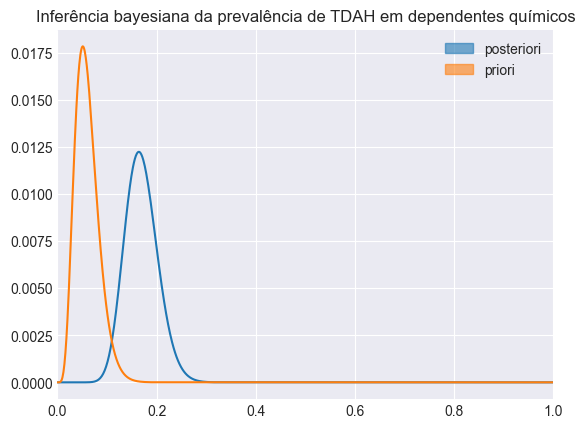

In [176]:
from conjugate_prior import BetaBinomial
tdah = df['TDAH'].sum()
not_tdah = len(df) - df['TDAH'].sum()
prior_model = BetaBinomial(0.06) 
#print(prior_model.mean())
updated_model = prior_model.update(tdah, not_tdah)
credible_interval = updated_model.posterior(0.06, 1)
print("Com base nas presuposições assumidas e na evidência observada:")
print ("- {p:.2f}% de chance que pacientes com TDAH tenham maior prevalência de dependência química do que a população geral".format(p=credible_interval*100))

ci = 0.05
posterior = updated_model.posterior(updated_model.mean() - ci, updated_model.mean() + ci)
#updated_model.predict(0.5)
p=posterior*100 
mu = updated_model.mean()*100
ci_100 = ci*100
print (f"- {p:.2f}% de chance de que a prevalência de TDAH em dependentes químicos esteja entre {mu-ci_100:.2f}% e {mu+ci_100:.2f}%")

updated_model.plot()
prior_model.plot()
colors = {'priori':'C1', 'posteriori':'C0'}
labels = ['posteriori', 'priori']
handles = [plt.Rectangle((0,0),1,1, color=colors[label], alpha = 0.6) for label in labels]
plt.legend(handles, labels)
plt.title('Inferência bayesiana da prevalência de TDAH em dependentes químicos')
plt.show()
#plt.vlines(0.5,0,, color='grey',linestyles='--')

Pesquisas corroboram com esse resultado: https://www.webmd.com/add-adhd/adhd-and-substance-abuse-is-there-a-link

# Ideias
Questão motivadora: vale a pena investigar tdah para dependencia química? <br>

Análise de sintomas
- [x] perguntas que mais/menos pontuaram
- [x] ordenar questões pelas que pontuaram mais 4
- [x] distribuição dos sintomas
- [x] < 24 (A ou B)?
- [x] média de idade
- [x] correlação entre As e B's

Análise de variância
- [x] desvio padrão de cada participante, participantes extremos
- [x] sintomas com maiores desvio-padrão, respostas com valores extremos

Análise mais sofisticadas
- [ ] Cluster
- [ ] Análise de regressão

Inferência
- Qual a probabilidade de se ter dependência química, uma vez que se tenha TDAH? $P(D|T)$
- TDAH causa a dependência química? Inferência causal.